# (i) ROC curve

In [ ]:
import pandas as pd
import numpy as np
import jsonlines
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X = []; y = []; z = []
df = pd.read_json('reviews.jl', lines = True)
df = df[['text', 'voted_up', 'early_access']]
#df.head()

#remove non-ascii characters
#https://qxf2.com/blog/cleaning-data-python-pandas/
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df.head())

X = df['text'].values
print("\ntext:\n", X)

y = df['voted_up'].values
print("\nvoted_up:\n", y)

z = df['early_access'].values
print("\nearly_access:\n", z)


                                                text  voted_up  early_access
0                                 Needs more content      True         False
1  With the Zombie FPS market still expanding, co...      True         False
2                                                         True         False
3  pretty good, but very difficult at first. requ...      True         False
4           best game ever i love it thank you valve      True         False

text:
 ['Needs more content'
 "With the Zombie FPS market still expanding, companies are continuing to struggle to bring a fresh experience to players interested in the Z-market. However, being a massive fan of Zombie games, I gave Contagion a try and can easily recommend this game to anyone who loves Zombie FPS. Yes! It is only in Beta but considering this, they've done a fantastic job so far and I found very very few problems, and even those problems DID NOT ruin the gameplay experience. All I can say is, for the price... give it

In [3]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf = True, max_df = 0.95)
tfidf_vectorizer.fit_transform(X)

train_set = tfidf_vectorizer.transform(X)
test_set = tfidf_vectorizer.transform(X)

# FEATURES
X_train = train_set
X_test = test_set 

Y_train = y
Y_test= y

Z_train = z
Z_test = z

In [5]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train, Y_train)
print("\nIntercept:", model.intercept_)
print("\nCoef:", model.coef_)

xpred = model.predict(X_train)
ypred = model.predict(X_test)

# Use score method to get accuracy of model
score = log_reg.score(X_test, Y_test)
print("\nScore:", score)


Intercept: [-0.04704324]

Coef: [[-0.47763833 -0.3528016  -0.01186131 ...  0.01355819  0.06746615
   0.41021428]]

Score: 0.854


[False  True]
AUC Score: 0.93632064


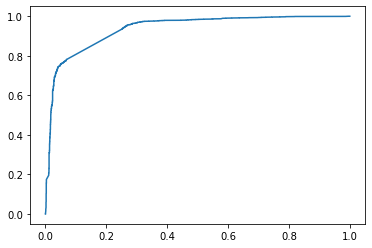

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics

preds = log_reg.predict_proba(X_test)
print(model.classes_)
fpr, tpr, _ = roc_curve(Y_test, preds[:,1])
plt.plot(fpr, tpr)

auc_score = metrics.roc_auc_score(Y_test, preds[:,1])
print("AUC Score:", auc_score)

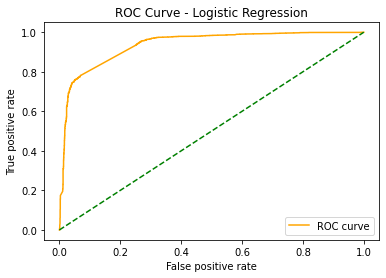

In [9]:
fpr, tpr, _ = roc_curve(Y_test, log_reg.decision_function(X_test))
plt.plot(fpr, tpr, color='orange')
plt.legend(['ROC curve','Logistic Regression'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve - Logistic Regression')
plt.show()


## kNN

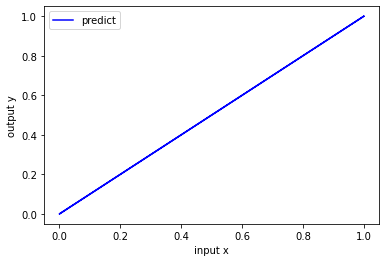

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X_train, Y_train)
xpred = model.predict(X_train)
ypred = model.predict(X_test)
#plt.scatter(X_train, Y_train, color = 'red', marker = '+')
plt.plot(xpred, ypred, color = 'blue')
plt.xlabel("input x"); plt.ylabel("output y"); plt.legend(["predict", "train"])
plt.show()

[False  True]
AUC Score: 0.75105672


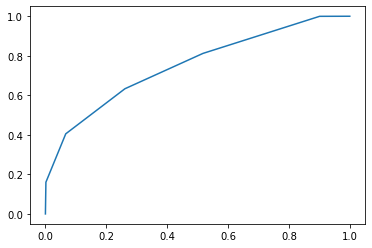

In [11]:
from sklearn.metrics import roc_curve
preds = model.predict_proba(X_test)
print(model.classes_)
fpr, tpr, _ = roc_curve(Y_test, preds[:,1])
plt.plot(fpr, tpr)

from sklearn import metrics
auc_score = metrics.roc_auc_score(Y_test, preds[:,1])
print("AUC Score:", auc_score)

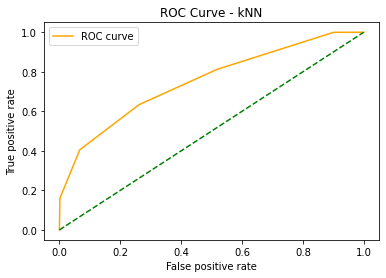

In [14]:
fpr, tpr, _ = roc_curve(Y_test, preds[:,1])
plt.plot(fpr, tpr, color='orange')
plt.legend(['ROC curve','Logistic Regression'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve - kNN')
plt.show()

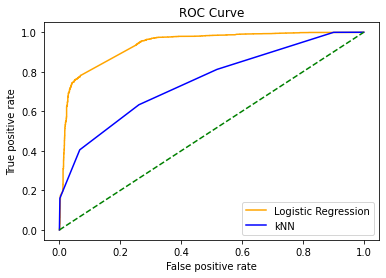

In [18]:
fpr, tpr, _ = roc_curve(Y_test, log_reg.decision_function(X_test))
plt.plot(fpr, tpr, color='orange')

knn_fpr, knn_tpr, _ = roc_curve(Y_test, preds[:,1])
plt.plot(knn_fpr, knn_tpr, color='blue')

plt.legend(['Logistic Regression', 'kNN'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve')
plt.show()


# (ii) ROC curve

In [38]:
import pandas as pd
import numpy as np
import jsonlines
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier

In [39]:
X = []; y = []; z = []
df = pd.read_json('reviews.jl', lines = True)
df = df[['text', 'voted_up', 'early_access']]
#df.head()

#remove non-ascii characters
#https://qxf2.com/blog/cleaning-data-python-pandas/
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df.head())

X = df['text'].values
print("\ntext:\n", X)

y = df['voted_up'].values
print("\nvoted_up:\n", y)

z = df['early_access'].values
print("\nearly_access:\n", z)


                                                text  voted_up  early_access
0                                 Needs more content      True         False
1  With the Zombie FPS market still expanding, co...      True         False
2                                                         True         False
3  pretty good, but very difficult at first. requ...      True         False
4           best game ever i love it thank you valve      True         False

text:
 ['Needs more content'
 "With the Zombie FPS market still expanding, companies are continuing to struggle to bring a fresh experience to players interested in the Z-market. However, being a massive fan of Zombie games, I gave Contagion a try and can easily recommend this game to anyone who loves Zombie FPS. Yes! It is only in Beta but considering this, they've done a fantastic job so far and I found very very few problems, and even those problems DID NOT ruin the gameplay experience. All I can say is, for the price... give it

In [47]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf = True, max_df = 0.95)
tfidf_vectorizer.fit_transform(X)

train_set = tfidf_vectorizer.transform(X)
test_set = tfidf_vectorizer.transform(X)

# FEATURES
X_train = train_set
X_test = test_set 

Y_train = y
Y_test= y

Z_train = z
Z_test = z

In [48]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train, Z_train)
print("\nIntercept:", model.intercept_)
print("\nCoef:", model.coef_)

xpred = model.predict(X_train)
zpred = model.predict(X_test)

# Use score method to get accuracy of model
score = log_reg.score(X_test, Z_test)
print("\nScore:", score)


Intercept: [-2.22475922]

Coef: [[ 0.21193807 -0.12174736 -0.00300896 ... -0.0021769  -0.01431211
  -0.08992057]]

Score: 0.8932


[False  True]
AUC Score: 0.9151325339612147


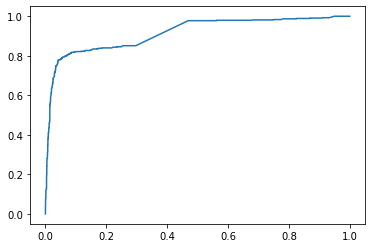

In [49]:
from sklearn.metrics import roc_curve
preds = log_reg.predict_proba(X_test)
print(model.classes_)
fpr, tpr, _ = roc_curve(Z_test, preds[:,1])
plt.plot(fpr, tpr)

auc_score = metrics.roc_auc_score(Z_test, preds[:,1])
print("AUC Score:", auc_score)

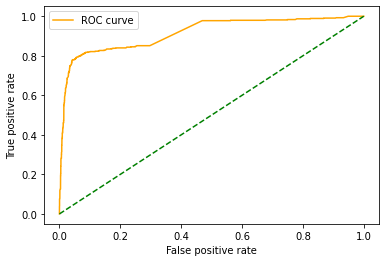

In [50]:
fpr, tpr, _ = roc_curve(Z_test, log_reg.decision_function(X_test))
plt.plot(fpr, tpr, color='orange')
plt.legend(['ROC curve','Logistic Regression'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()

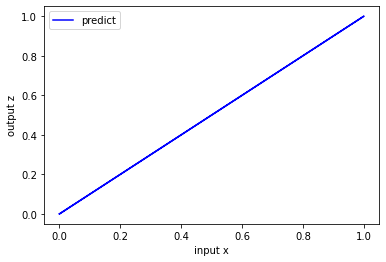

In [51]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform').fit(X_train, Z_train)
xpred = model.predict(X_train)
zpred = model.predict(X_test)
#plt.scatter(X_train, Y_train, color = 'red', marker = '+')
plt.plot(xpred, zpred, color = 'blue')
plt.xlabel("input x"); plt.ylabel("output z"); plt.legend(["predict", "train"])
plt.show()

[False  True]
AUC Score: 0.7963837570322674


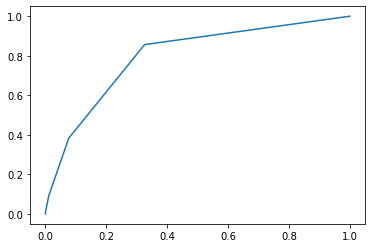

In [52]:
from sklearn.metrics import roc_curve
zpreds = model.predict_proba(X_test)
print(model.classes_)
fpr, tpr, _ = roc_curve(Z_test, zpreds[:,1])
plt.plot(fpr, tpr)

from sklearn import metrics
auc_score = metrics.roc_auc_score(Z_test, zpreds[:,1])
print("AUC Score:", auc_score)

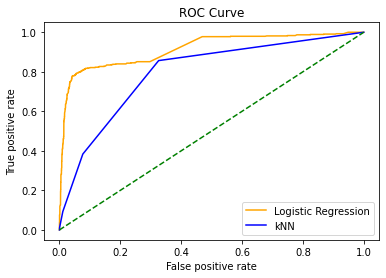

In [60]:
fpr, tpr, _ = roc_curve(Z_test, log_reg.decision_function(X_test))
plt.plot(fpr, tpr, color='orange')

knn_fpr, knn_tpr, _ = roc_curve(Z_test, zpreds[:,1])
plt.plot(knn_fpr, knn_tpr, color='blue')
plt.legend(['Logistic Regression','kNN'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve')
plt.show()

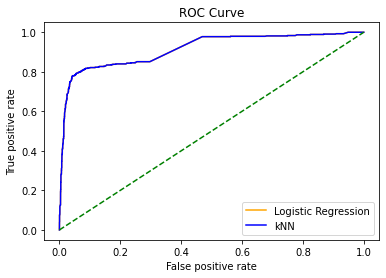

In [56]:
fpr, tpr, _ = roc_curve(Z_test, log_reg.decision_function(X_test))
plt.plot(fpr, tpr, color='orange')

knn_fpr, knn_tpr, _ = roc_curve(Z_test, preds[:,1])
plt.plot(knn_fpr, knn_tpr, color='blue')

plt.legend(['Logistic Regression', 'kNN'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve')
plt.show()
